In [1]:
import os
import pandas as pd
import numpy as np
import glob
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils, transforms
import matplotlib.pyplot as plt

In [2]:
from dataloading import *

In [3]:
plt.rcdefaults()

# Use Odd spectrograms

In [4]:
def plot_spectrogram(spec, title, time, frequency, start_longest_mode=None, end_longest_mode=None):
    fig, ax = plt.subplots()
    ax.imshow(spec.T, extent=(time[0], time[-1], frequency[0], frequency[-1]), aspect='auto', cmap='jet',
              origin='lower')
    ax.set_xlim(time[0], time[-1])
    ax.set_ylim(frequency[0], frequency[-1])
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Frequency [Hz]")
    fig.set_dpi(150)
    plt.title(title)

    # Plot vertical lines if start and end times are provided
    if start_longest_mode is not None and end_longest_mode is not None:
        ax.axvline(x=start_longest_mode, color='blue', linestyle='--', label='Start of Longest Mode')
        ax.axvline(x=end_longest_mode, color='darkblue', linestyle='--', label='End of Longest Mode')
        plt.legend(loc='upper left')

    plt.show()

In [5]:
# Example usage
DATA_PATH = "data/dataset_pickle"
FILE_EXT = "pickle"
WINDOW_SIZE = 64 # Number of datapoints
OVERLAP_FACTOR = 0.4 # Overlap factor between 0 and 1 for each sliding window ("% overlap with the last window")

dataset = SpectrogramDataset(data_path=DATA_PATH, file_ext=FILE_EXT, window_size=WINDOW_SIZE, overlap_factor = OVERLAP_FACTOR)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, collate_fn = custom_collate)

The size of the odd spectrogram in the last element of windows: torch.Size([2049, 64]).
Total number of windows = 6549
Number of unique IDs = 6549


torch.Size([2049, 64])


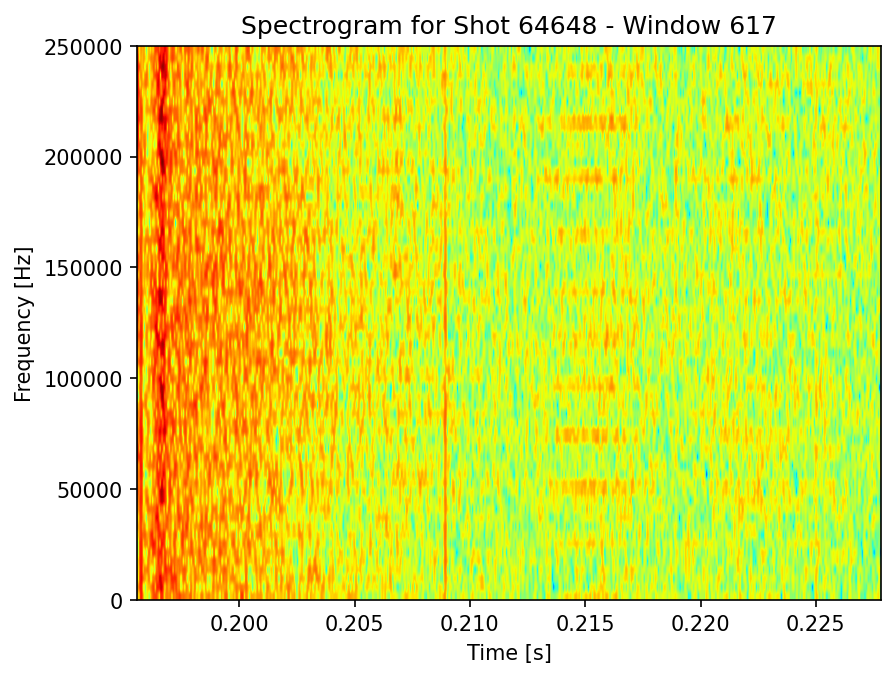

In [8]:
# Iterate through the dataloader
for idx, batch in enumerate(dataloader):
    #print(f"Batch {idx + 1} - Number of Windows: {len(batch)}")
    print(batch[0]['window_odd'].shape) # First item of the batch --> Very weird indexing
    plot_spectrogram(
    batch[0]['window_odd'],
    f"Spectrogram for Shot {batch[0]['shotno']} - Window {batch[0]['unique_id']}",
    batch[0]['time'],
    batch[0]['frequency']
    )
        
    break

In [12]:
# Iterate through the dataloader
for idx, batch in enumerate(dataloader):
    print(f"Batch {idx + 1} - Number of Windows: {len(batch)}")
    print(batch[0].keys()) 
    print(batch[0]['window_odd'].shape)
    break

Batch 1 - Number of Windows: 32
dict_keys(['unique_id', 'window_odd', 'frequency', 'time', 'start_idx', 'end_idx', 'shotno'])
torch.Size([2049, 64])
